<a href="https://colab.research.google.com/github/rb7488/SIC_Project/blob/main/01_data_collection_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Data Collection, Preprocessing & EDA

Goal:
- Load and understand the dataset
- Clean and preprocess data
- Perform exploratory data analysis
- Prepare clean data for modeling (Notebook 2)

Dataset Example:
UCI HAR(Human Activity Recognition) Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = "/content/drive/MyDrive/Adaptive_Inference_Project"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Libraries imported successfully")

Libraries imported successfully


In [ ]:
# Download UCI HAR Dataset
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip -q UCI\ HAR\ Dataset.zip

print("Dataset downloaded and extracted")

Dataset downloaded and extracted


In [ ]:
def load_har_data(split='train'):
    X = pd.read_csv(
        f'UCI HAR Dataset/{split}/X_{split}.txt',
        delim_whitespace=True,
        header=None
    )

    y = pd.read_csv(
        f'UCI HAR Dataset/{split}/y_{split}.txt',
        header=None,
        names=['Activity']
    )

    subject = pd.read_csv(
        f'UCI HAR Dataset/{split}/subject_{split}.txt',
        header=None,
        names=['Subject']
    )

    return X, y, subject

In [ ]:
X_train, y_train, subject_train = load_har_data('train')
X_test, y_test, subject_test = load_har_data('test')

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (7352, 561)
Test shape: (2947, 561)


In [ ]:
# Feature names
features = pd.read_csv(
    'UCI HAR Dataset/features.txt',
    delim_whitespace=True,
    header=None,
    names=['index', 'feature']
)

X_train.columns = features['feature']
X_test.columns = features['feature']

# Activity labels
activity_labels = pd.read_csv(
    'UCI HAR Dataset/activity_labels.txt',
    delim_whitespace=True,
    header=None,
    names=['id', 'label']
)

activity_map = dict(zip(activity_labels.id, activity_labels.label))
y_train['Activity'] = y_train['Activity'].map(activity_map)
y_test['Activity'] = y_test['Activity'].map(activity_map)

print("Features and labels mapped")

Features and labels mapped


In [ ]:
train_df = pd.concat([X_train, y_train, subject_train], axis=1)
test_df = pd.concat([X_test, y_test, subject_test], axis=1)

print("Final Train DF shape:", train_df.shape)
print("Final Test DF shape:", test_df.shape)

Final Train DF shape: (7352, 563)
Final Test DF shape: (2947, 563)


In [ ]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Subject
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
train_df.isnull().sum().sum()

np.int64(0)

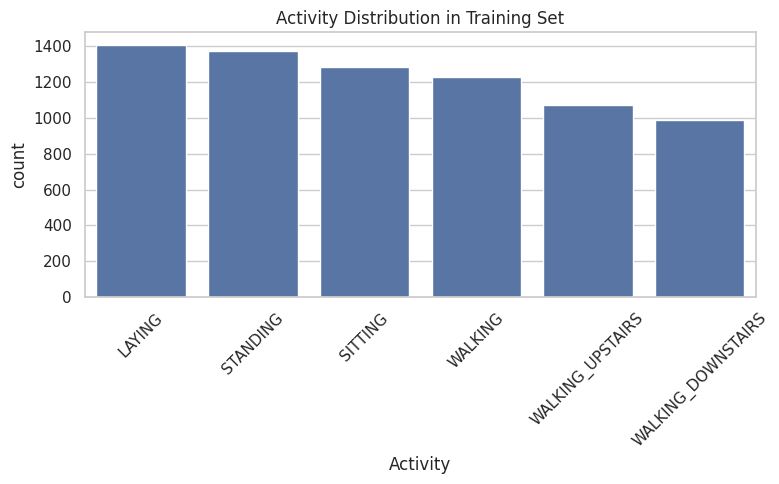

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x='Activity', order=train_df['Activity'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Activity Distribution in Training Set")
plt.tight_layout()
plt.show()

In [ ]:
train_df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
tBodyAcc-std()-Z,7352.0,-0.604754,0.418687,-1.000000,-0.980233,-0.859365,-0.262415,1.000000
tBodyAcc-mad()-X,7352.0,-0.630512,0.424073,-1.000000,-0.993591,-0.950709,-0.292680,1.000000
tBodyAcc-mad()-Y,7352.0,-0.526907,0.485942,-1.000000,-0.978162,-0.857328,-0.066701,0.967664
tBodyAcc-mad()-Z,7352.0,-0.606150,0.414122,-1.000000,-0.980251,-0.857143,-0.265671,1.000000
tBodyAcc-max()-X,7352.0,-0.468604,0.544547,-1.000000,-0.936219,-0.881637,-0.017129,1.000000


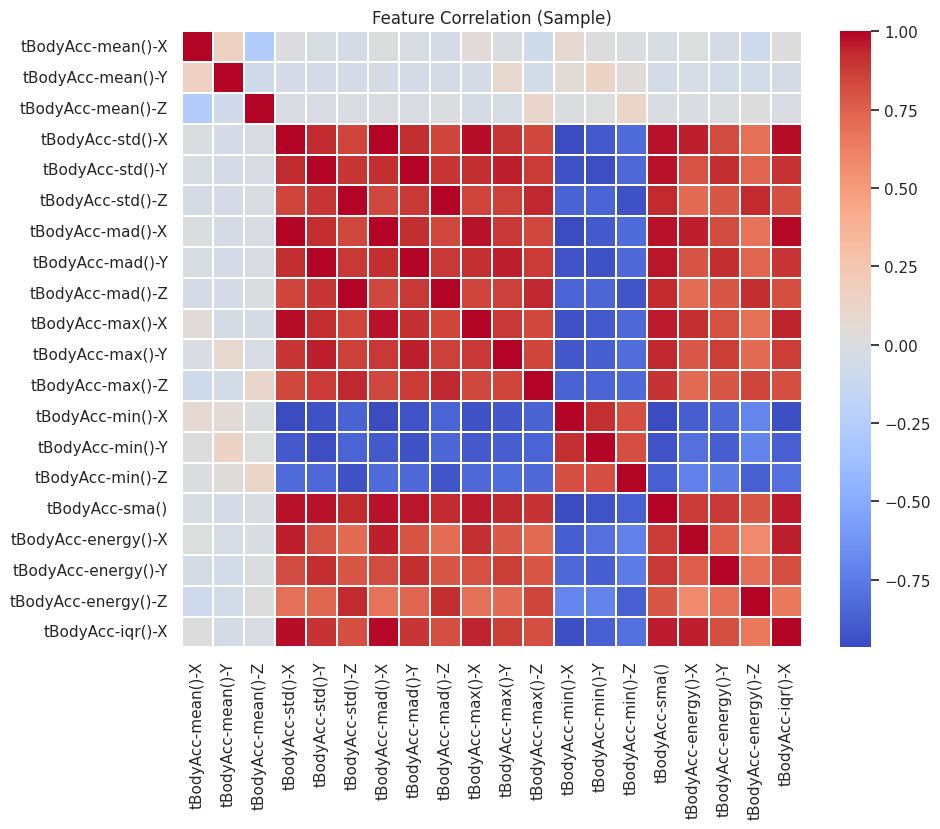

In [ ]:
# Sampling features to avoid huge heatmap
sample_features = train_df.iloc[:, :20]

plt.figure(figsize=(10,8))
sns.heatmap(sample_features.corr(), cmap='coolwarm', linewidths=0.3)
plt.title("Feature Correlation (Sample)")
plt.show()

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")

Feature scaling completed


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train['Activity'])
y_test_enc = label_encoder.transform(y_test['Activity'])

print("Encoded Classes:", label_encoder.classes_)

Encoded Classes: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [ ]:
import numpy as np
import os

os.makedirs(f"{BASE_PATH}/processed_data", exist_ok=True)

np.save(f"{BASE_PATH}/processed_data/X_train.npy", X_train_scaled)
np.save(f"{BASE_PATH}/processed_data/X_test.npy", X_test_scaled)
np.save(f"{BASE_PATH}/processed_data/y_train.npy", y_train_enc)
np.save(f"{BASE_PATH}/processed_data/y_test.npy", y_test_enc)

print("Processed data saved for next notebook")

Processed data saved for next notebook


In [ ]:
print("""
Notebook 1 Completed:
- Dataset loaded & cleaned
- Exploratory Data Analysis performed
- Features scaled
- Labels encoded
- Data saved for baseline modeling
""")


Notebook 1 Completed:
- Dataset loaded & cleaned
- Exploratory Data Analysis performed
- Features scaled
- Labels encoded
- Data saved for baseline modeling

